# GRIP:THE SPARKS FOUNDATION DATA SCIENE AND BUSINESS ANALYTICS(JAN 2022)

## AUTHOR: CHANDRIMA THAKUR

## TASK # 1 : PREDICTION USING SUPERVISED ML 
### Problem Statement
Predict the percentage of student based on the number of study hours.What will be the predicted score if a student studies for 9.25 hours/day.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

 ## IMPORTING THE LIBRARIES

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## READING THE DATA

In [5]:
sdf=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully:")
sdf.head()

Data imported successfully:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## LOOK INTO THE SHAPE

In [6]:
sdf.shape

(25, 2)

WE SEE THAT THERE ARE 25 ROWS AND 2 COLUMNS

## DESCRIPTIVE SUMMARY OF THE DATASET

In [8]:
sdf.describe().T # here t is for transpose

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## LOOK INTO THE INFO OF THE DATASET

In [9]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## CHECKING FOR MISSING VALUES

In [11]:
sdf.isnull().sum()

Hours     0
Scores    0
dtype: int64

We Find out that there are no missing values in the data set

# EDA

## CHECKING FOR OUTLIERS

<AxesSubplot:>

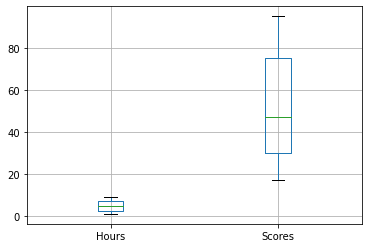

In [12]:
sdf.boxplot()

 NO OUTLIERS FOUND

## HISTOGRAM FOR HOURS

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

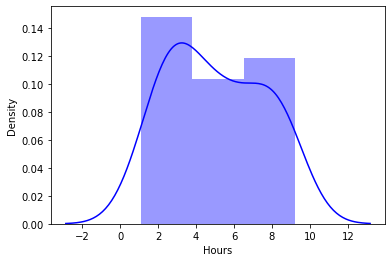

In [13]:
sns.distplot(sdf['Hours'],label='hour',color='blue')

## HISTOGRAM FOR SCORES

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

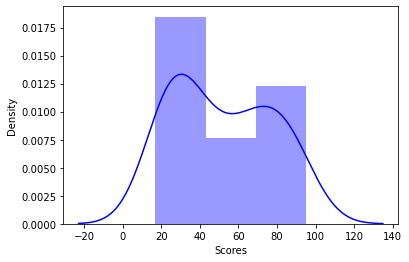

In [15]:
sns.distplot(sdf['Scores'],label='Scores',color='blue' )

## SCATTER PLOT

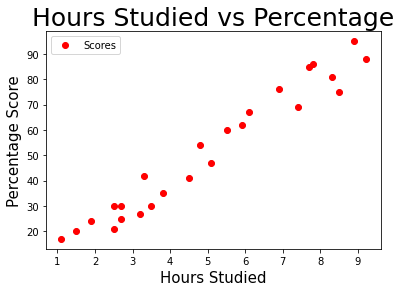

In [17]:
sdf.plot(x='Hours', y='Scores', style='o', color= 'red') 
sns.scatterplot(y= sdf['Scores'], x= sdf['Hours'])
plot.title('Hours Studied vs Percentage',size=25)
plot.ylabel('Percentage Score', size=15)
plot.xlabel('Hours Studied', size=15)
plot.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied 
and percentage of score,number of study hours increases then scores of the student also increases.

# REGRESSION PLOT

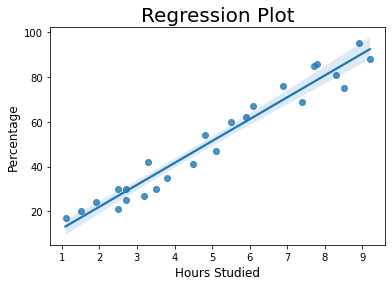

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [20]:
sns.regplot(x= sdf['Hours'], y= sdf['Scores'])
plot.title('Regression Plot',size=20)
plot.ylabel('Percentage', size=12)
plot.xlabel('Hours Studied', size=12)
plot.show()
print(sdf.corr())

We can see that the variables are positively corelated

# MODEL BUILDING

### DATA PREPARATION

In [26]:
X = sdf.iloc[:, :-1].values  
y = sdf.iloc[:, 1].values
y.shape, X.shape

((25,), (25, 1))

### SPLITTING THE DATA INTO TRAINING AND TESTING

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### TRAINING THE ALGORITHM

In [67]:
reg = LinearRegression()  
model=reg.fit(x_train, y_train) 
print("Training complete.")

Training complete.


### PREDICTING THE PERCENTAGE MARKS

In [68]:
y_pred = model.predict(x_test) # Predicting the scores
pred = pd.DataFrame({' Hours': [i[0] for i in x_test], '  Marks predicted': [k for k in y_pred]})
pred ## priniing our predictions where Testing data - In Hours

,Hours,Marks predicted
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### COMPARING : ACTUAL  MARKS VS PREDICTIED MARKS

In [69]:
actual_predicted = pd.DataFrame({'Actual Marks':y_test,'Predicted Marks':y_pred})
actual_predicted

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### VISUAL REPRESENTATION

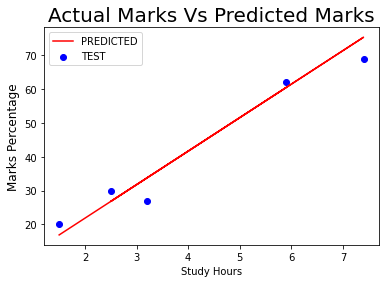

In [70]:
plot.scatter(x_test, y_test, color='blue',label='TEST')
plot.plot(x_test,y_pred,color="red",label="PREDICTED")
plot.title('Actual Marks Vs Predicted Marks', size=20)
plot.ylabel('Marks Percentage', size=12)
plot.xlabel('Study Hours', size=10)
leg=plot.legend()
plot.show()

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [71]:
hrs = 9.25
predc = model.predict([[hrs]])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predc[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


According to the linear regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.

# EVALUATING THE MODEL

In [74]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356
